# Clustering Analysis of Personality Survey Data  
>Dataset used:  https://www.kaggle.com/lucasgreenwell/ocean-five-factor-personality-test-responses   

>Bigger Dataset:  https://www.kaggle.com/tunguz/big-five-personality-test  

**Plan 0:  Analysis Process**  

1.  Questions defintely are not scaled the same.  For example, hypothetical questions like "E1.  I talk a lot" and "E2.  I don't talk a lot" are opposites but their scores would be 4 & 2 potentially based on a Likert how much do you agree with the statement scale.  Both questions indicate the same sentiment about extroversion.  So the negative questions (ie uses 'don't') should be rescaled.  In this case the scaling is done by `scaled = 6 - negative_score`.  Now the responses would be 4 & 4 - both indicating extroverted behavior. 
1.  Manual scaling could be done since positive and negative statements have been determined but instead each question set could be passed through a clustering algorithm to check on the grouping. To check this we will plot the first question (ie E1) as the y and all other questions (ie E(i) ) for the x values.

In [3]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# # Needed:  conda install -c conda-forge -c plotly jupyter-dash


In [4]:
df_original = pd.read_csv('./data/data.csv', delimiter="\t")
df_original.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [5]:
# Data definitions
# race:  1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other (0=missed)
# age:  entered as text (individuals reporting age < 13 were not recorded)
# engnat:  Response to "is English your native language?". 1=yes, 2=no (0=missed)
# gender:  1=Male, 2=Female, 3=Other (0=missed)
# hand:  "What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)

In [6]:
# data types
df_original.dtypes

race        int64
age         int64
engnat      int64
gender      int64
hand        int64
source      int64
country    object
E1          int64
E2          int64
E3          int64
E4          int64
E5          int64
E6          int64
E7          int64
E8          int64
E9          int64
E10         int64
N1          int64
N2          int64
N3          int64
N4          int64
N5          int64
N6          int64
N7          int64
N8          int64
N9          int64
N10         int64
A1          int64
A2          int64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
C1          int64
C2          int64
C3          int64
C4          int64
C5          int64
C6          int64
C7          int64
C8          int64
C9          int64
C10         int64
O1          int64
O2          int64
O3          int64
O4          int64
O5          int64
O6          int64
O7          int64
O8          int64
O9        

In [7]:
df_questions = pd.read_csv('./data/coded_questions.txt', delimiter="\t", usecols=[0,1,2])
df_questions.head()

,ID,Question,Predicted_Grouping
0,E1,I am the life of the party.,Pos
1,E2,I don't talk a lot.,Neg
2,E3,I feel comfortable around people.,Pos
3,E4,I keep in the background.,Neg
4,E5,I start conversations.,Pos


### Extroversion Question Analysis
##### Question groups
##### Significance of questions

In [8]:
df_extroversion = df_original.loc[:, "E1":"E10"]
df_extroversion.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,4,2,5,2,5,1,4,3,5,1
1,2,2,3,3,3,3,1,5,1,5
2,5,1,1,4,5,1,1,5,5,1
3,2,5,2,4,3,4,3,4,4,5
4,3,1,3,3,3,1,3,1,3,5


In [9]:
df_extroversion_corr = df_extroversion.corr()
df_extroversion_corr

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
E1,1.000000,-0.421009,0.474275,-0.483781,0.479101,-0.346676,0.588100,-0.366534,0.455476,-0.414282
E2,-0.421009,1.000000,-0.445537,0.527723,-0.539518,0.570819,-0.479932,0.373481,-0.364713,0.463642
E3,0.474275,-0.445537,1.000000,-0.481006,0.590660,-0.393412,0.579883,-0.320097,0.423473,-0.473928
E4,-0.483781,0.527723,-0.481006,1.000000,-0.510068,0.474928,-0.503229,0.446221,-0.450755,0.510477
E5,0.479101,-0.539518,0.590660,-0.510068,1.000000,-0.480675,0.630796,-0.344639,0.416147,-0.542389
E6,-0.346676,0.570819,-0.393412,0.474928,-0.480675,1.000000,-0.405476,0.320371,-0.330175,0.412007
E7,0.588100,-0.479932,0.579883,-0.503229,0.630796,-0.405476,1.000000,-0.344825,0.433230,-0.533139
E8,-0.366534,0.373481,-0.320097,0.446221,-0.344639,0.320371,-0.344825,1.000000,-0.514314,0.380939
E9,0.455476,-0.364713,0.423473,-0.450755,0.416147,-0.330175,0.433230,-0.514314,1.000000,-0.371440
E10,-0.414282,0.463642,-0.473928,0.510477,-0.542389,0.412007,-0.533139,0.380939,-0.371440,1.000000


In [10]:
#### Extroversion Columns
##### Note:  Neg Correlated columns are:  ["E2", "E4", "E6", "E8", "E10"]
e_series = df_extroversion_corr.loc["E1",:]
negative_columns = e_series[e_series<0].index.to_list()

# ##### Note:  Most Important Columns (as is):  ['E1', 'E7', 'E4', 'E5', 'E3', 'E9', 'E2', 'E10', 'E8', 'E6']
e_series = df_extroversion_corr.loc["E1",:]
e_series_sorted = e_series.abs().sort_values(ascending=False)
most_important_columns_unscaled = list(e_series_sorted.index)
most_important_columns_unscaled

['E1', 'E7', 'E4', 'E5', 'E3', 'E9', 'E2', 'E10', 'E8', 'E6']

figure, axes = plt.subplots(9, figsize=(10,100))
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0, 6)
columns = list(df_extroversion.columns)[1:10]

for col in columns:
    sns.kdeplot(data = df_extroversion, x=col, y="E1", cmap="Reds", shade=True, ax=axes[columns.index(col)])


In [11]:
# ## Not Working

# fig = make_subplots(rows=9, cols=1)

# columns = list(df_extroversion.columns)[1:10]

# for colm in columns:
#     fig.append_trace(go.Histogram2d(
#         x=df_extroversion[colm],
#         y=df_extroversion["E1"],
#         texttemplate="%{z}"
#     ), row=columns.index(colm)+1, col=1)

# fig.update_layout(height=600, width=600, title_text="Heat Map")
# fig.show()


# ##############################

# # fig = make_subplots(rows=9, cols=1)

# # columns = list(df_extroversion.columns)[1:10]


# fig = go.Figure(go.Histogram2d(
#         x=df_extroversion["E2"],
#         y=df_extroversion["E1"],
#         texttemplate="%{z}"
#     ))

# fig.update_layout(height=600, width=600, title_text="Heat Map")
# fig.show()

In [12]:

df_extroversion_scaled = df_extroversion.apply(lambda x:  6-x if x.name in ["E2", "E4", "E6", "E8", "E10"] else x)
df_extroversion_scaled 

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,4,4,5,4,5,5,4,3,5,5
1,2,4,3,3,3,3,1,1,1,1
2,5,5,1,2,5,5,1,1,5,5
3,2,1,2,2,3,2,3,2,4,1
4,3,5,3,3,3,5,3,5,3,1
...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1
19715,2,3,2,3,2,3,2,2,4,2
19716,2,1,4,1,5,1,1,4,1,1
19717,1,2,2,3,2,2,1,3,4,1


In [13]:
t = df_extroversion_scaled.corr().loc["E1",:]
t

E1     1.000000
E2     0.421009
E3     0.474275
E4     0.483781
E5     0.479101
E6     0.346676
E7     0.588100
E8     0.366534
E9     0.455476
E10    0.414282
Name: E1, dtype: float64

##### Let's get all the correlation values for all 5 factors in one dataframe and scale all the columns in one step

In [14]:
ocean = ["E", "A", "N", "C", "O" ]
correlation_matrix=[]
for letter in ocean:
    frame = df_original.loc[:, letter+str(1):letter+str(10)]
    correlation_frame = frame.corr()[letter+str(1)]
    correlation_frame.index = range(1,11)
    correlation_frame.name = letter
    correlation_matrix.append(correlation_frame)

correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,1,2,3,4,5,6,7,8,9,10
E,1.0,-0.421009,0.474275,-0.483781,0.479101,-0.346676,0.588100,-0.366534,0.455476,-0.414282
A,1.0,-0.230562,0.189427,-0.331072,0.339470,-0.211202,0.345170,-0.262260,-0.253498,-0.125992
N,1.0,-0.464167,0.553714,-0.250632,0.389769,0.535274,0.415586,0.433760,0.485879,0.421863
C,1.0,-0.259677,0.300260,-0.347802,0.389468,-0.310033,0.309801,-0.316973,0.427178,0.330635
O,1.0,-0.328021,0.241947,-0.229804,0.310012,-0.205684,0.342042,0.633424,0.199870,0.302354


In [15]:
columns = correlation_df.columns.to_list()
rows = correlation_df.index.to_list()
new_column_data=[]

for letter in rows:
    column_names = []
    for number in columns:
        column_names.append(letter+str(number))
    row_series = correlation_df.loc[letter,:]
    correlation_series = row_series.apply(lambda x: "Pos" if x>0 else "Neg")
    correlation_series.index=column_names
    new_column_data.append(correlation_series)

concated_series = pd.concat(new_column_data,axis=0)
new_column = pd.DataFrame(concated_series, columns=["Correlated_Grouping"]).reset_index()
df_questions = pd.merge(df_questions, new_column, left_on="ID", right_on="index").drop('index', axis='columns')

In [16]:
df_questions.head()

,ID,Question,Predicted_Grouping,Correlated_Grouping
0,E1,I am the life of the party.,Pos,Pos
1,E2,I don't talk a lot.,Neg,Neg
2,E3,I feel comfortable around people.,Pos,Pos
3,E4,I keep in the background.,Neg,Neg
4,E5,I start conversations.,Pos,Pos


In [17]:
disagreement_df = df_questions[df_questions['Predicted_Grouping'] != df_questions['Correlated_Grouping']]
print(len(disagreement_df))
disagreement_df

0


,ID,Question,Predicted_Grouping,Correlated_Grouping


In [18]:
negative_columns = df_questions[df_questions["Correlated_Grouping"] == "Neg"]["ID"].to_list()
negative_columns

['E2',
 'E4',
 'E6',
 'E8',
 'E10',
 'N2',
 'N4',
 'A2',
 'A4',
 'A6',
 'A8',
 'A9',
 'A10',
 'C2',
 'C4',
 'C6',
 'C8',
 'O2',
 'O4',
 'O6']

In [19]:
df_original_scaled = df_original.apply(lambda x:  6-x if x.name in negative_columns else x)
df_original_scaled 

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,4,5,...,4,5,3,5,5,5,4,2,5,5
1,13,46,1,2,1,1,US,2,4,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,5,1,...,4,1,5,5,5,5,5,5,5,5
3,3,19,2,2,1,1,RO,2,1,2,...,4,3,5,4,4,4,5,2,5,5
4,11,25,2,2,1,2,US,3,5,3,...,3,5,1,5,3,5,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,2,3,...,1,3,5,3,4,5,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,4,3,4,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,1,4,...,5,3,1,3,4,5,1,5,5,5
19717,12,16,1,1,1,5,NG,1,2,2,...,3,4,5,3,4,5,5,3,5,5


In [20]:
df_original_scaled ['E_avg'] = df_original_scaled.loc[:,'E1':'E10'].sum(axis=1)/10.
df_original_scaled ['N_avg'] = df_original_scaled.loc[:,'N1':'N10'].sum(axis=1)/10.
df_original_scaled ['A_avg'] = df_original_scaled.loc[:,'A1':'A10'].sum(axis=1)/10.
df_original_scaled ['C_avg'] = df_original_scaled.loc[:,'C1':'C10'].sum(axis=1)/10.
df_original_scaled ['O_avg'] = df_original_scaled.loc[:,'O1':'O10'].sum(axis=1)/10.
df_original_scaled 

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O6,O7,O8,O9,O10,E_avg,N_avg,A_avg,C_avg,O_avg
0,3,53,1,1,1,1,US,4,4,5,...,5,4,2,5,5,4.4,1.1,1.4,4.7,4.3
1,13,46,1,2,1,1,US,2,4,3,...,3,3,1,3,2,2.2,3.1,2.5,4.2,2.6
2,1,14,2,2,1,1,PK,5,5,1,...,5,5,5,5,5,3.5,4.6,2.2,4.9,4.5
3,3,19,2,2,1,1,RO,2,1,2,...,4,5,2,5,5,2.2,4.3,2.3,2.6,4.1
4,11,25,2,2,1,2,US,3,5,3,...,5,3,1,5,3,3.4,3.0,1.6,3.4,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,2,3,...,5,4,2,5,3,2.1,4.1,1.8,3.6,3.5
19715,3,37,1,2,1,2,US,2,3,2,...,3,4,2,3,3,2.5,2.1,2.4,3.2,3.0
19716,5,16,2,1,1,2,US,2,1,4,...,5,1,5,5,5,2.1,5.0,3.4,2.3,3.7
19717,12,16,1,1,1,5,NG,1,2,2,...,5,5,3,5,5,2.1,4.0,2.2,4.3,4.2


In [21]:
# How to determine which questions are the most important?


In [22]:
def personality_class(data):
    
    personality_list = []
    personality_string = ""
    
    
    if data['E_avg']>3.0:
        personality_list.append("E")
    else:
        personality_list.append("e")
        
    if data['N_avg']>3.0:
        personality_list.append("N")
    else:
        personality_list.append("n")
        
        
    if data['A_avg']>3.0:
        personality_list.append("A")
    else:
        personality_list.append("a")
        
        
    if data['C_avg']>3.0:
        personality_list.append("C")
    else:
        personality_list.append("c")        
        
        
    if data['O_avg']>3.0:
        personality_list.append("O")
    else:
        personality_list.append("o")
        
        
    personality_string = personality_string.join(personality_list)
    
    return personality_string

In [23]:
df_original_scaled['personality_type_avg']=""
df_original_scaled['personality_type_avg'] = df_original_scaled.apply(personality_class,axis=1  )
df_original_scaled

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O7,O8,O9,O10,E_avg,N_avg,A_avg,C_avg,O_avg,personality_type_avg
0,3,53,1,1,1,1,US,4,4,5,...,4,2,5,5,4.4,1.1,1.4,4.7,4.3,EnaCO
1,13,46,1,2,1,1,US,2,4,3,...,3,1,3,2,2.2,3.1,2.5,4.2,2.6,eNaCo
2,1,14,2,2,1,1,PK,5,5,1,...,5,5,5,5,3.5,4.6,2.2,4.9,4.5,ENaCO
3,3,19,2,2,1,1,RO,2,1,2,...,5,2,5,5,2.2,4.3,2.3,2.6,4.1,eNacO
4,11,25,2,2,1,2,US,3,5,3,...,3,1,5,3,3.4,3.0,1.6,3.4,3.4,EnaCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,2,3,...,4,2,5,3,2.1,4.1,1.8,3.6,3.5,eNaCO
19715,3,37,1,2,1,2,US,2,3,2,...,4,2,3,3,2.5,2.1,2.4,3.2,3.0,enaCo
19716,5,16,2,1,1,2,US,2,1,4,...,1,5,5,5,2.1,5.0,3.4,2.3,3.7,eNAcO
19717,12,16,1,1,1,5,NG,1,2,2,...,5,3,5,5,2.1,4.0,2.2,4.3,4.2,eNaCO


In [25]:
df = df_original_scaled[ df_original_scaled['personality_type_avg'].apply(lambda x:  x[0]) == "E"]
print(df['E1'].value_counts(normalize=True))
print(len(df['E1']))

3    0.360952
4    0.324324
5    0.136909
2    0.124596
1    0.053219
Name: E1, dtype: float64
9583


In [26]:
df = df_original_scaled[ df_original_scaled['personality_type_avg'].apply(lambda x:  x[0]) == "e"]
print(df['E1'].value_counts(normalize=True))
print(len(df['E1']))

1    0.411306
2    0.324487
3    0.201066
4    0.047652
5    0.015391
0    0.000099
Name: E1, dtype: float64
10136


In [ ]:
# Are different countries answering the same way - is the distribution of answers the samee for US and SE Asia
# https://stats.stackexchange.com/questions/2374/factor-analysis-of-questionnaires-composed-of-likert-items


In [ ]:
# ##### Note:  Most Important Columns (as is):  ['E1', 'E7', 'E4', 'E5', 'E3', 'E9', 'E2', 'E10', 'E8', 'E6']
e_series = df_extroversion_corr.loc["E1",:]
e_series_sorted = e_series.abs().sort_values(ascending=False)
most_important_columns_unscaled = list(e_series_sorted.index)
most_important_columns_unscaled

In [27]:
from factor_analyzer import FactorAnalyzer

In [28]:
all_x_df = df_original_scaled.loc[:,"E1":"O10"]
all_x_df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,4,4,5,4,5,5,4,3,5,5,...,4,5,3,5,5,5,4,2,5,5
1,2,4,3,3,3,3,1,1,1,1,...,3,3,3,3,2,3,3,1,3,2
2,5,5,1,2,5,5,1,1,5,5,...,4,1,5,5,5,5,5,5,5,5
3,2,1,2,2,3,2,3,2,4,1,...,4,3,5,4,4,4,5,2,5,5
4,3,5,3,3,3,5,3,5,3,1,...,3,5,1,5,3,5,3,1,5,3


In [ ]:
# First Step - test if FA is appropriate

In [40]:
fa = FactorAnalyzer(n_factors = 12, rotation="varimax")

In [59]:
only_extrovert = all_x_df.loc[:,"E1":"E10"]
fa.fit(only_extrovert)

FactorAnalyzer(n_factors=12, rotation='varimax', rotation_kwargs={})

In [60]:
# get the loadin scores
loadings = fa.loadings_
loadings

array([[ 0.3596562 ,  0.21184667,  0.31414786,  0.53360682,  0.09256926,
         0.03864199,  0.00291918,  0.02567552, -0.00330291,  0.        ],
       [ 0.28644357,  0.67610577,  0.22078679,  0.18165706,  0.08520245,
        -0.00150874,  0.1110851 ,  0.01061434, -0.01159202,  0.        ],
       [ 0.60882737,  0.25884319,  0.23895843,  0.20824024,  0.08452841,
         0.17083079, -0.01266034, -0.00474678, -0.0053975 ,  0.        ],
       [ 0.30452287,  0.42294585,  0.36191463,  0.24921544,  0.36050297,
         0.10220655, -0.01047425,  0.03091745,  0.03152171,  0.        ],
       [ 0.66536428,  0.3949469 ,  0.21200515,  0.15395372,  0.07005957,
        -0.02800482,  0.00429728,  0.07863626,  0.01689795,  0.        ],
       [ 0.24324399,  0.65624994,  0.19126881,  0.09986632,  0.07717043,
         0.0077795 , -0.08337563, -0.01525557,  0.00533182,  0.        ],
       [ 0.62739649,  0.24302934,  0.21015189,  0.45494247,  0.09212973,
        -0.10612207, -0.00133934, -0.08612327

In [61]:
# get the eigenvectors / eingenvalues
ev, v = fa.get_eigenvalues()

In [64]:
x_values = range(1,only_extrovert.shape[1]+1)

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

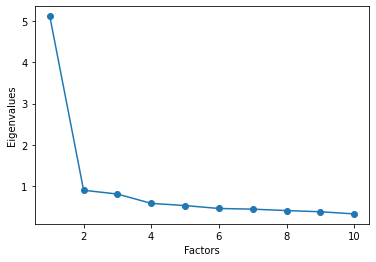

In [65]:
#Scree plot

plt.scatter(x_values, ev)
plt.plot(x_values, ev)
plt.xlabel("Factors")
plt.ylabel("Eigenvalues")
plt.grid

In [66]:
# 8th element looks at the equilibrium

In [67]:
loadings_df = pd.DataFrame.from_records(loadings)
loadings_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.359656,0.211847,0.314148,0.533607,0.092569,0.038642,0.002919,0.025676,-0.003303,0.0
1,0.286444,0.676106,0.220787,0.181657,0.085202,-0.001509,0.111085,0.010614,-0.011592,0.0
2,0.608827,0.258843,0.238958,0.208240,0.084528,0.170831,-0.012660,-0.004747,-0.005397,0.0
3,0.304523,0.422946,0.361915,0.249215,0.360503,0.102207,-0.010474,0.030917,0.031522,0.0
4,0.665364,0.394947,0.212005,0.153954,0.070060,-0.028005,0.004297,0.078636,0.016898,0.0


In [68]:
loadings_squared_df = loadings_df.apply(lambda x:  x**2)
loadings_squared_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.129353,0.044879,0.098689,0.284736,0.008569,0.001493,0.000009,0.000659,0.000011,0.0
1,0.082050,0.457119,0.048747,0.032999,0.007259,0.000002,0.012340,0.000113,0.000134,0.0
2,0.370671,0.067000,0.057101,0.043364,0.007145,0.029183,0.000160,0.000023,0.000029,0.0
3,0.092734,0.178883,0.130982,0.062108,0.129962,0.010446,0.000110,0.000956,0.000994,0.0
4,0.442710,0.155983,0.044946,0.023702,0.004908,0.000784,0.000018,0.006184,0.000286,0.0


In [69]:
score = loadings_squared_df.sum(axis=1)

In [70]:
loadings_df['scored']=score
loadings_df.sort_values(by='scored', axis=0, ascending=False)

,0,1,2,3,4,5,6,7,8,9,scored
6,0.627396,0.243029,0.210152,0.454942,0.092130,-0.106122,-0.001339,-0.086123,0.007297,0.0,0.731048
4,0.665364,0.394947,0.212005,0.153954,0.070060,-0.028005,0.004297,0.078636,0.016898,0.0,0.679521
1,0.286444,0.676106,0.220787,0.181657,0.085202,-0.001509,0.111085,0.010614,-0.011592,0.0,0.640764
3,0.304523,0.422946,0.361915,0.249215,0.360503,0.102207,-0.010474,0.030917,0.031522,0.0,0.607176
8,0.269060,0.168780,0.657757,0.212851,-0.009243,0.082908,-0.088817,0.023472,-0.014602,0.0,0.594441
2,0.608827,0.258843,0.238958,0.208240,0.084528,0.170831,-0.012660,-0.004747,-0.005397,0.0,0.574676
0,0.359656,0.211847,0.314148,0.533607,0.092569,0.038642,0.002919,0.025676,-0.003303,0.0,0.568398
5,0.243244,0.656250,0.191269,0.099866,0.077170,0.007779,-0.083376,-0.015256,0.005332,0.0,0.549617
7,0.136788,0.222279,0.658127,0.097407,0.153623,-0.060671,0.073591,-0.020838,0.010383,0.0,0.543976
9,0.479632,0.319004,0.267004,0.122611,0.318811,-0.099942,0.018100,-0.036020,-0.035127,0.0,0.532623
